# Variación de d' para LDA y PCA

In [15]:
import urllib
import pandas as pd
train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)
train_df.head()
test_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


In [16]:
from sklearn.preprocessing import StandardScaler
X = train_df.ix[:,'x.1':'x.10'].values
y = train_df.ix[:,'y'].values
X_std = StandardScaler().fit_transform(X)
Xtest = test_df.ix[:,'x.1':'x.10'].values
ytest = test_df.ix[:,'y'].values
X_std_test = StandardScaler().fit_transform(Xtest)

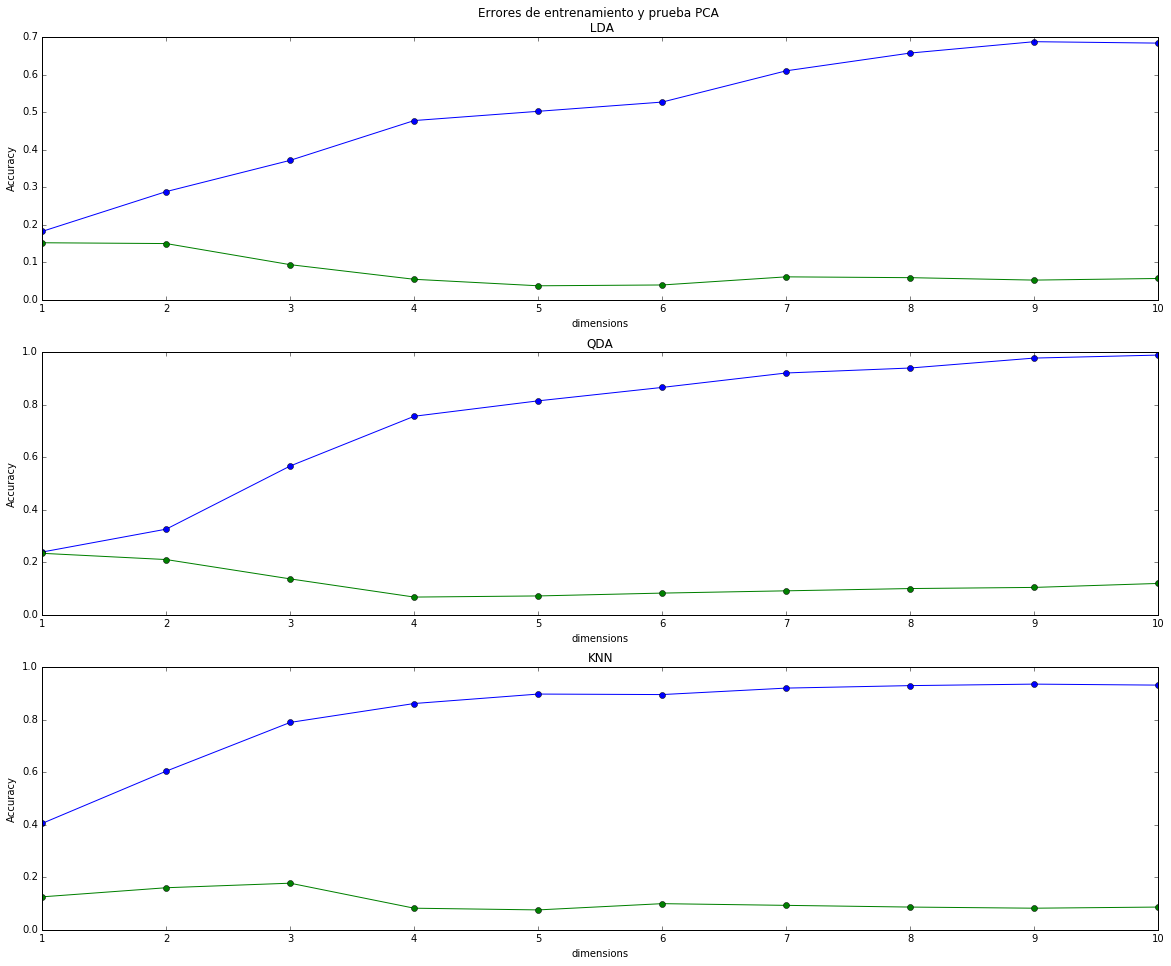

In [28]:
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

models_scores = [[] for i in range(6)]
models = { 0: LDA(),
          1: QDA(),
          2: KNeighborsClassifier(n_neighbors=10)
}
for i in range(3):
    model = models[i]    
    for j in range(1,11):
        sklearn_pca = PCA(n_components=j)
        Xred_pca = sklearn_pca.fit_transform(X_std)
        Xred_pca_test = sklearn_pca.fit_transform(X_std_test)
        #model training
        model.fit(Xred_pca,y)
        models_scores[2*i].append(model.score(Xred_pca,y))
        models_scores[2*i+1].append(model.score(Xred_pca_test,ytest))
    
%matplotlib inline
%matplotlib inline
plt.figure(1, figsize=(20, 16))
plt.subplot(311)
plt.title('Errores de entrenamiento y prueba PCA \n LDA')
plt.xlabel('dimensions')
plt.ylabel('Accuracy')
plt.plot(range(1,11),models_scores[0],'-bo')
plt.plot(range(1,11),models_scores[1],'-go')

plt.subplot(312)
plt.title('QDA')
plt.xlabel('dimensions')
plt.ylabel('Accuracy')
plt.plot(range(1,11),models_scores[2],'-bo')
plt.plot(range(1,11),models_scores[3],'-go')

plt.subplot(313)
plt.title('KNN')
plt.xlabel('dimensions')
plt.ylabel('Accuracy')
plt.plot(range(1,11),models_scores[4],'-bo')
plt.plot(range(1,11),models_scores[5],'-go')
plt.show()

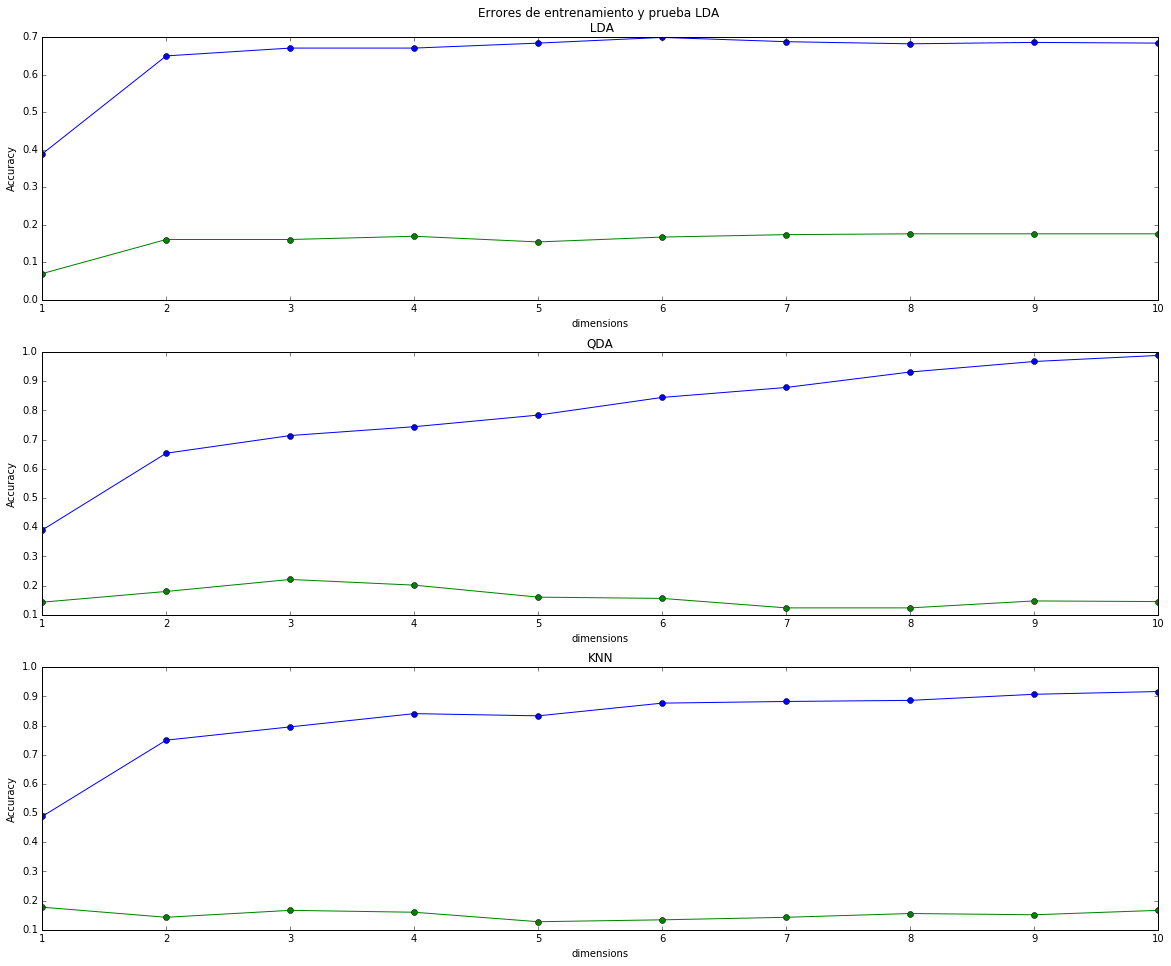

In [29]:
models_scores = [[] for i in range(6)]
for i in range(3):
    model = models[i]    
    for j in range(1,11):
        sklearn_pca = LDA(n_components=j)
        Xred_pca = sklearn_pca.fit_transform(X_std,y)
        Xred_pca_test = sklearn_pca.fit_transform(X_std_test,ytest)
        #model training
        model.fit(Xred_pca,y)
        models_scores[2*i].append(model.score(Xred_pca,y))
        models_scores[2*i+1].append(model.score(Xred_pca_test,ytest))
    
%matplotlib inline
plt.figure(1, figsize=(20, 16))
plt.subplot(311)
plt.title('Errores de entrenamiento y prueba LDA \n LDA')
plt.xlabel('dimensions')
plt.ylabel('Accuracy')
plt.plot(range(1,11),models_scores[0],'-bo')
plt.plot(range(1,11),models_scores[1],'-go')

plt.subplot(312)
plt.title('QDA')
plt.xlabel('dimensions')
plt.ylabel('Accuracy')
plt.plot(range(1,11),models_scores[2],'-bo')
plt.plot(range(1,11),models_scores[3],'-go')

plt.subplot(313)
plt.title('KNN')
plt.xlabel('dimensions')
plt.ylabel('Accuracy')
plt.plot(range(1,11),models_scores[4],'-bo')
plt.plot(range(1,11),models_scores[5],'-go')
plt.show()

De los gráficos se puede concluir que en general, para ambas técnicas, es decir PCA Y LDA, al ir disminuyendo la dimensionalidad del dataset tiende a disminuir la precisión que se alcanza en el training set. En el caso de la reducción via PCA los modelos de LDA y QDA bajan significativamente su precisión en el training set al considerar 3 o menos dimensiones. Por otra parte LDA tiende a mantener la precisión en el training set a medida que baja la dimensionalidad. Observando que disminuye considerablemente cuando se tiene sólo 1 dimensión.

Por otra parte, al aplicar las técnicas de reducción se observa que la precisión del testing set, al contrario de lo que ocurre con la precisión en el trainig set, aumenta a medida que se diminuye la dimensionalidad para el caso de PCA. Sin embargo, esta mejora en la precisión es leve. En el caso de LDA los mejores resultados para precisión se encuentran al disminuir la dimensionalidad en el intervalo de 1 a 4.